# CNN | Image Classification using Julia
Basics of Approximation | Weronika Kieliszek

## Significance of Models
Deep learning models for image classification have immense significance in medicine, particularly in diagnosing diseases based on images. The use of deep neural networks enables computers to "see" and interpret images in a manner comparable to humans, opening new possibilities in medical diagnostics.
For example, mobile applications utilizing deep learning can diagnose skin lesions for cancerous changes, which is crucial for the early detection of skin cancer. Additionally, AI can diagnose rare genetic diseases by analyzing facial images, significantly reducing the time needed to detect unusual mutations. The application of deep learning models in medical imaging is of interest to major technology companies like Microsoft, indicating the potential of this technology in the future. By automatically discovering data representations effective for specific tasks, these systems can significantly improve diagnostic accuracy and optimize medical processes.
It is worth noting that the development of deep learning technology is made possible by the exponential increase in the performance of graphics processors, making these systems accessible to a wide range of users. In the medical context, the ability of deep learning models to continuously improve and perform analytical processes is crucial, as it can lead to high accuracy in disease diagnosis.

## Origin and Evolution
The origin and evolution of deep learning models are closely related to the development of artificial intelligence and machine learning. Deep learning, a subfield of machine learning, relies on the use of deep neural networks to model complex patterns in data. The inspiration for these models came from the structure and functioning of the human brain, allowing the creation of computer programs capable of learning from experience in a manner similar to humans.

### History and Development
The beginnings of deep learning date back to the 1950s and 1960s when simple neural network models were first experimented with. However, it was only in recent decades, thanks to the significant increase in computing power and the availability of large datasets, that this technology began to develop dynamically.
A crucial moment for deep learning was the introduction of the backpropagation algorithm in 1986, which enabled the efficient training of multilayer neural networks. Another breakthrough was the use of convolutional neural networks (CNNs) by a team of scientists from the University of Toronto in 2012 for image classification in the ImageNet competition, significantly improving image recognition accuracy and accelerating the development of the technology.

### Evolution of Models
The evolution of deep learning models is characterized by the transition from simple neural networks to more complex architectures, such as convolutional neural networks (CNNs), recurrent neural networks (RNNs), long short-term memory networks (LSTMs), and Generative Adversarial Networks (GANs). These advanced models enable not only image classification but also the generation of new data, natural language processing, speech recognition, and many other applications.

### Impact on Other Fields
The development of deep learning has had a tremendous impact on many fields of science and technology, including medicine, astronomy, robotics, and data analysis. In medicine, these models are used to diagnose diseases based on medical images. In astronomy, deep learning helps analyze data from telescopes and simulate cosmic phenomena. In business, this technology automates processes and aids in analyzing large datasets.

### Conclusions
The evolution of deep learning models results from the combination of advances in computer science, mathematics, and neurobiology. Thanks to the dynamic development of these models, it has become possible to solve problems that seemed unattainable just a few decades ago. With further advancements in artificial intelligence, we can expect even greater breakthroughs that will impact various aspects of daily life and scientific work.

In [1]:
using Images
using Random
using Flux
using Statistics
using TensorBoardLogger, Logging

## Data

As part of the project, I am analyzing a set of skin cancer images that are classified based on different types of skin lesions. The aim of the project is to develop a deep learning model that will be able to accurately classify images according to the following classes:
- vascular lesion,
- squamous cell carcinoma,
- actinic keratosis,
- epidermal granuloma (dermatofibroma),
- melanoma (melanoma),
- birthmark (nevus),
- benign pigmented keratosis,
- senile keratosis (seborrheic keratosis),
- basal cell carcinoma.

Each of these classes represents a specific type of skin lesion that may have different clinical implications, from benign lesions to serious skin cancers such as melanoma. The project aims to use advanced deep learning techniques to learn how to recognize and classify these changes based on images. This will make it possible not only to diagnose skin diseases faster and more precisely, but also to better understand the characteristics of individual types of lesions, which may contribute to improving treatment and prevention methods.

Source: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic

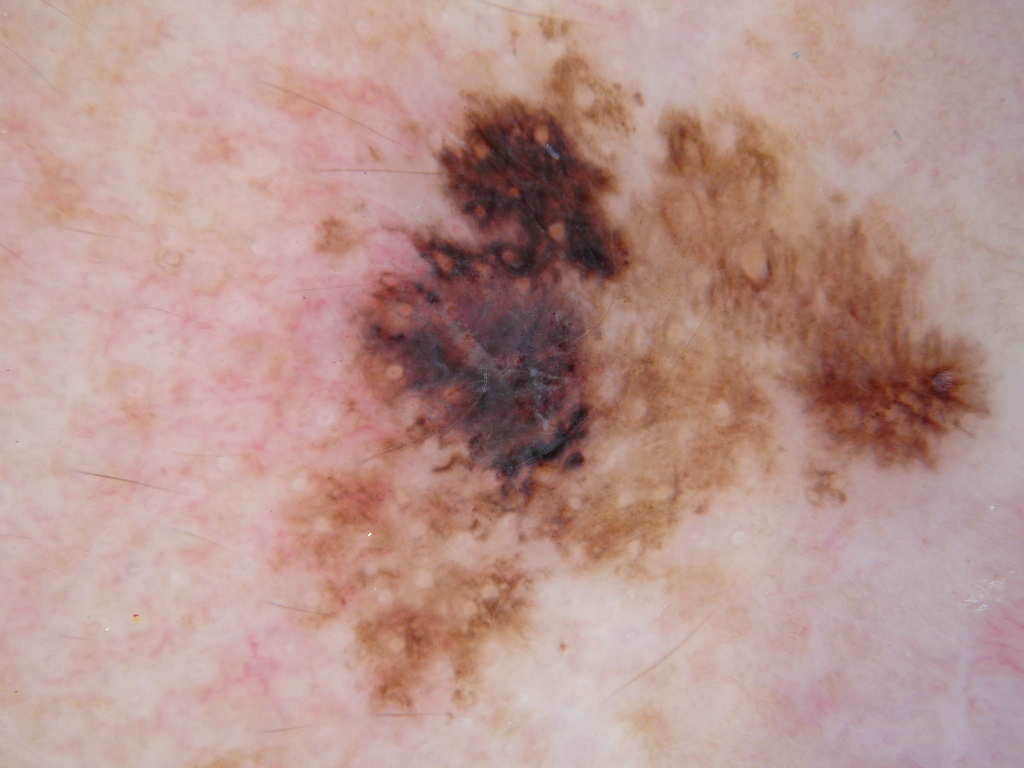

In [2]:
image_path = "/Users/weronikakieliszek/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010653.jpg"
img = load(image_path)

During experiments with image processing, it turned out that the best results were achieved by using the Laplace filter. It is an image processing technique that uses the Laplace operator to highlight the edges and other important features of an image, which is helpful in classification. This filter is applied by the Kernel.Laplacian() imfilter function. After applying a filter, images are often converted to grayscale, which simplifies analysis by reducing the image to a single intensity channel. This method is used because it highlights important image features such as edges and helps reduce noise, which is crucial in medical analysis.

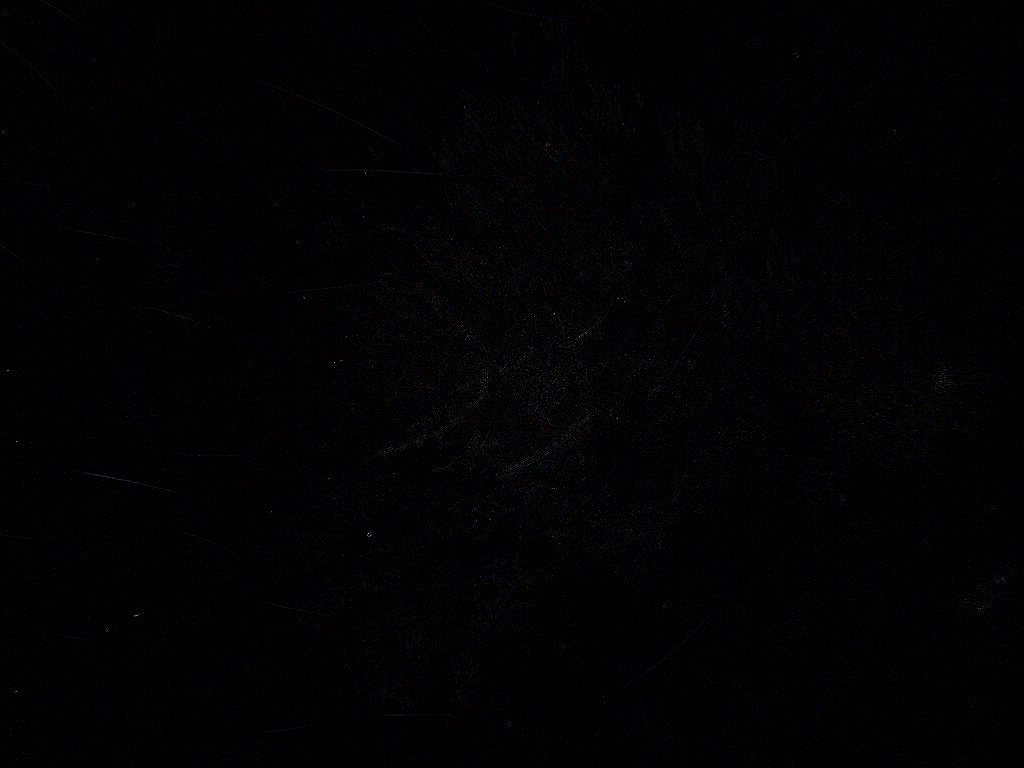

In [3]:
img_ = imfilter(img, Kernel.Laplacian())

The load_data function is used to load image data from a directory structure, where each subdirectory represents an image class. Here is a detailed description of how the function works:
1. Initialize empty arrays: The function initializes two empty arrays, images to store the image data and labels to store the corresponding class labels.
2. Iterating over classes: The function uses enumerate to iterate over a collection called classes, which is not defined in the function but is expected to be an iterable list of class names. The enumerate function provides a tuple containing the index (starting at 1) and the value from the iterable classes.
3. Constructing the class directory path: For each class, constructs the path to the directory containing the images of that class using a joinpath that joins data_directory with class_name to form the full path.
4. Reading files in the class directory: Uses readdir to list all files in the class directory.
5. Processing each image file: For each file in the class directory, constructs the full path to the image file, loads the image, applies a Laplace filter (probably for edge detection), resizes the image to the specified height and width, and then converts the image to a view channel (which probably means the color channels are separated).
6. Storing image and label data: The processed image is then added to the images array and the class index is added to the labels array.
7. Returning data: Finally, the function returns the images and labels arrays containing the loaded and processed image data and the corresponding class labels.

In [4]:
function load_data(data_directory)
    images = []
    labels = Int[]
    for (class_index, class_name) in enumerate(classes)
        class_path = joinpath(data_directory, class_name)
        files = readdir(class_path)
        
        for file in files
            image_path = joinpath(class_path, file)
            img = load(image_path)
            img = imfilter(img, Kernel.Laplacian())
            img = channelview(imresize(img, (img_height, img_width)))
            push!(images, img)
            push!(labels, class_index)
        end
    end
    return images, labels
end

load_data (generic function with 1 method)

In [5]:
img_height = 128
img_width = 128

128

In [6]:
data_directory_train = "/Users/weronikakieliszek/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/train"
data_directory_test = "/Users/weronikakieliszek/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/test"

classes = ["vascular lesion", "squamous cell carcinoma", "seborrheic keratosis", "pigmented benign keratosis", "nevus", "melanoma", "dermatofibroma", "basal cell carcinoma", "actinic keratosis"]

9-element Vector{String}:
 "vascular lesion"
 "squamous cell carcinoma"
 "seborrheic keratosis"
 "pigmented benign keratosis"
 "nevus"
 "melanoma"
 "dermatofibroma"
 "basal cell carcinoma"
 "actinic keratosis"

In [7]:
test_x, test_y = load_data(data_directory_test)
train_x, train_y = load_data(data_directory_train)

(Any[[-0.017608715 0.045689724 … -0.021496812 0.043488618; -0.02872054 0.046435595 … -0.008411749 0.0721594; -0.044348355 0.015324386 … -0.006500829 0.046357017;;; 0.024001405 0.0064232275 … -0.0061455104 -0.02686322; 0.019644218 0.0052945004 … 0.0045324196 -0.03701743; 0.012595701 0.04532208 … 0.0039493456 -0.064942375;;; 0.03655226 -0.016723197 … -0.03209733 -0.008041385; 0.025085194 -0.009563631 … -0.011059133 0.012240587; 0.02940312 -0.029164769 … -0.0022565816 -0.047398686;;; … ;;; 0.023063121 0.014720227 … -0.0093577355 -0.027104415; -0.007116447 0.013187469 … -0.037116125 -0.0326517; -0.025000002 0.009583764 … 0.024656327 -0.046063125;;; 0.008653053 -0.015620281 … 0.013068711 0.0027735964; -0.009450638 -0.011486095 … 0.0076373597 0.0021867047; -0.04240387 0.0016831404 … 0.017780164 -0.005223675;;; 0.031783324 -0.027327413 … -0.0074860766 0.04725702; 0.05075732 -0.014697254 … -0.008203098 0.031290226; 0.038416233 -0.047780756 … -0.02237671 0.03831386], [-0.03729987 0.03480686 … 0

In [8]:
@show size(train_x)
@show size(train_y)
@show size(test_x)
@show size(test_y)

size(train_x) = (2239,)
size(train_y) = (2239,)
size(test_x) = (118,)
size(test_y) = (118,)


(118,)

The function reduce((x, y) -> cat(x, y, dims=4), test_x) is used to combine arrays along a specified dimension.
The reduce function is a higher-order function that takes two values: a function and a collection. The function is applied to each pair of elements in the collection such that the result of the previous call is used as one of the arguments to the next one. In this case, the function is cat, which combines the arrays, and the collection is test_x.
In the context of deep learning, such array fusion can be used to create one large dataset from many smaller arrays. For example, if test_x is a list of images, then the result of this operation will be one large array containing all the images. This can be useful when you want to process all images as one large batch, rather than processing them individually or in smaller batches.

In [9]:
train_x = reduce((x, y) -> cat(x, y, dims=4), train_x)
test_x = reduce((x, y) -> cat(x, y, dims=4), test_x)

3×128×128×118 Array{Float32, 4}:
[:, :, 1, 1] =
 -0.0207883   -0.0239765  0.0381539  …  0.026484    0.00105704  -0.0203546
 -0.00731851  -0.0147987  0.0477846     0.0365904   0.0171798    0.00148686
 -0.0596603   -0.0115607  0.0333266     0.0202723  -0.00341795  -0.0253476

[:, :, 2, 1] =
 0.0156489   0.000735259  -0.00096307  …  -0.00887906   0.0205671
 0.0153732  -0.0108341    -0.00395126     -0.00864064  -0.00864161
 0.0124473  -0.01223      -0.0062366      -0.00841846   0.00347353

[:, :, 3, 1] =
 0.0153291  0.042983     0.014097     0.00930038  …   0.0342467    0.00455447
 0.0130102  0.00449316   0.0020441   -0.00555301     -0.00799159   0.00132125
 0.0101093  0.0819538   -0.00283779  -0.00375405      0.0146455   -0.00692403

;;; … 

[:, :, 126, 1] =
  0.000928599  0.0214049   0.0267051  -0.0273111  …  -0.0307693   0.0374014
 -0.000896033  0.00338353  0.0145689  -0.0368289      0.0063343  -0.00462048
 -0.007957     0.0404728   0.0185155  -0.0521915     -0.0249282   0.00180566

[:,

This code is used to visually inspect the dataset by displaying one random image from each class, which is helpful in checking that the images have been loaded correctly and understanding what kind of images each class contains. This is often done as part of deep learning to ensure that the data is properly labeled and to get an overview of the data before starting the training process.

classes[i] = "vascular lesion"


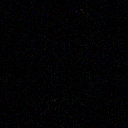

classes[i] = "squamous cell carcinoma"


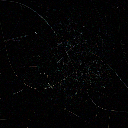

classes[i] = "seborrheic keratosis"


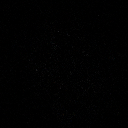

classes[i] = "pigmented benign keratosis"


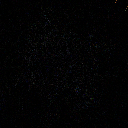

classes[i] = "nevus"


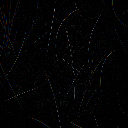

classes[i] = "melanoma"


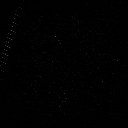

classes[i] = "dermatofibroma"


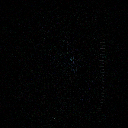

classes[i] = "basal cell carcinoma"


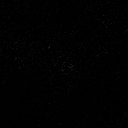

classes[i] = "actinic keratosis"


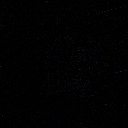

In [10]:
for i in 1:9
    label_indices = findall(train_y .== i)
    random_index = rand(label_indices)
    rgb_image = colorview(RGB, train_x[:, :, :, random_index])
    @show classes[i]
    display(rgb_image)
end

Rozkład zestawów treningowych i testowych po klasach:

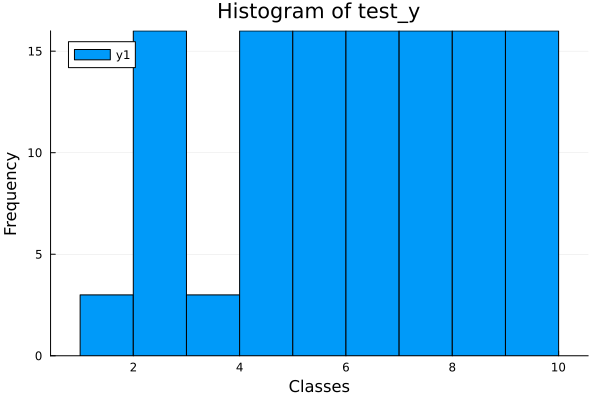

In [11]:
using Plots

histogram(test_y, bins=10, xlabel="Classes", ylabel="Frequency", title="Histogram of test_y")

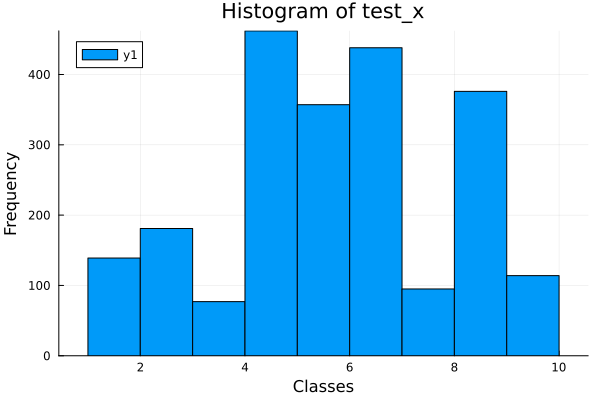

In [12]:
histogram(train_y, bins=10, xlabel="Classes", ylabel="Frequency", title="Histogram of test_x")

Przygotowanie danych do przepuszczenia przez model:

In [13]:
X = permutedims(train_x, (2, 3, 1, 4))

X_test = permutedims(test_x, (2, 3, 1, 4))

Y = Flux.onehotbatch(train_y, 1:9)
Y_test = Flux.onehotbatch(test_y, 1:9)

9×118 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 1  1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  1  1  1  1  1  1  1  1  1     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  1  1  1  1  1  1  1  1  1  1  1

In [14]:
batch_size = 32;
num_classes = 9;

DataLoader from the Flux.Data package is a Julia data loading tool. For CNN (Convolutional Neural Networks) models, DataLoader can be used to efficiently load and prepare training and test data.

Here's what DataLoader does and why it is used in CNN models:

1. Loading Data: DataLoader is used to load training and test data. In my case, DataLoader is used to load training data (X, Y) and test data (X_test, Y_test).
2. Data shuffle: The shuffle=true parameter means that the data will be shuffled before each training epoch. Mixing data is important so that the model does not learn from examples in the same order, which could lead to certain dependencies between subsequent examples that do not exist in reality.
3. Preparing data for the model: DataLoader can also perform other data preparation operations such as normalization, resizing images, cropping, etc. These operations are often necessary to make the data ready for use in the CNN model.
In summary, DataLoader makes it easier to load, mix and prepare training and test data for CNN models, allowing for more efficient and consistent model training.

In [15]:
using Flux.Data: DataLoader

train_loader = DataLoader((X, Y), batchsize=batch_size, shuffle=true)
test_loader = DataLoader((X_test, Y_test), shuffle=true)

118-element DataLoader(::Tuple{Array{Float32, 4}, OneHotArrays.OneHotMatrix{UInt32, Vector{UInt32}}}, shuffle=true)
  with first element:
  (128×128×3×1 Array{Float32, 4}, 9×1 OneHotMatrix(::Vector{UInt32}) with eltype Bool,)

In [16]:
use_cuda = true

true

In [17]:
using CUDA

if use_cuda && CUDA.functional()
    device = gpu
    @info "Training on GPU"
else
    device = cpu
    @info "Training on CPU"
end

[ Info: Training on CPU


Convolutional neural networks (CNN) are widely used for image recognition for several reasons:

- Hierarchical Feature Extraction: CNNs are able to automatically detect and extract various types of features from images at different levels of abstraction. Convolutional layers use filters to extract local patterns such as edges and textures, while pooling layers aggregate these features to create a hierarchy of increasingly complex features, which is crucial for image recognition.
- Invariance of Shifts and Scale Changes: Convolutions are shifting operations, which means that CNNs are invariant with respect to the shifts of objects in the image. This way, if an object is in different places in the image, the network can still recognize it. Additionally, pooling layers reduce the spatial dimensions of features, which makes the network more resistant to changes in the scale of objects.
- Learning Hierarchical Representations: CNNs learn hierarchical representations of images by backpropagating errors. During training, the network adjusts its weights to minimize the error between the predictions and the actual labels. In this way, the network becomes better and better at recognizing patterns in images.
- Effectiveness and Efficiency: CNNs are known for their effectiveness in image classification tasks, achieving results comparable to or even better than human classifiers. Additionally, many CNN implementations are optimized for performance, allowing them to be used in real time at scale.

Therefore, due to their ability to extract hierarchical features, invariance to shifts and scale changes, ability to learn image representations, and high effectiveness and efficiency, CNNs are often the architecture of choice for image recognition tasks.

Here I define a CNN model using Flux components such as convolutional layers (Conv), pooling layers (MaxPool), fully connected layers (Dense), activation functions (relu, softmax) and a flatten function for data flattening.

Step-by-step explanation of the model architecture:
- Conv((3, 3), 3 => 32, pad=(1, 1), relu): First convolutional layer with kernel size (3, 3), input with 3 channels (e.g. RGB), output with 32 channels, with ReLU activation function.
- MaxPool((2, 2)): The first pooling layer, performing a max pooling operation on the results of the previous layer, reducing the data size by half in both dimensions.
- Analogously for subsequent convolution and pooling layers, increasing the number of output channels at each step and reducing the data size.
- Flux.flatten: Flattens data into a 1D vector before passing it to fully connected layers.
- Dense(8192 => 1024, relu): First layer fully connected with 8192 inputs (due to the size of the flattened tensor) and 1024 outputs, with ReLU activation function.
- Dense(1024 => num_classes): Last layer fully connected with 1024 inputs and num_classes outputs (where num_classes is the number of classes in the classification problem), with no activation function (since softmax is used as the last step in the model).

In [18]:
using Flux: @epochs, onecold, onehotbatch, throttle, params, crossentropy
using Flux: Chain, Conv, Dense, MaxPool, flatten, logitcrossentropy, relu, DataLoader
using Flux.Data: DataLoader
using Statistics


model = Chain(
  Conv((3, 3), 3 => 32, pad=(1, 1), relu),
  MaxPool((2, 2)),
  Conv((3, 3), 32 => 64, pad=(1, 1), relu),
  MaxPool((2, 2)),
  Conv((3, 3), 64=>128, pad=(1, 1), relu),
  MaxPool((2, 2)),
  Conv((3, 3), 128=>256, pad=(1, 1), relu),
  MaxPool((2, 2)),
  Conv((3, 3), 256=>512, pad=(1, 1), relu),
  MaxPool((2, 2)),
  Flux.flatten,
  Dense(8192 => 1024, relu),
  Dense(1024 => num_classes),
    softmax
) |> device

Chain(
  Conv((3, 3), 3 => 32, relu, pad=1),   # 896 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 32 => 64, relu, pad=1),  # 18_496 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 64 => 128, relu, pad=1),  # 73_856 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 128 => 256, relu, pad=1),  # 295_168 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 256 => 512, relu, pad=1),  # 1_180_160 parameters
  MaxPool((2, 2)),
  Flux.flatten,
  Dense(8192 => 1024, relu),            # 8_389_632 parameters
  Dense(1024 => 9),                     # 9_225 parameters
  NNlib.softmax,
)                   # Total: 14 arrays, 9_967_433 parameters, 38.025 MiB.

This function defines the loss for the classification model.

In [19]:
function loss(x, y)
    y_pred = model(x)
    y_pred = clamp.(y_pred, 1e-7, 1.0 - 1e-7)
    return crossentropy(y_pred, y)
end

loss (generic function with 1 method)

In [20]:
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

accuracy (generic function with 1 method)

The ADAM optimizer value of 0.0001 is small enough to ensure a stable training process, minimizing the risk of oscillation around the global minimum of the cost function. At the same time, it is large enough to allow rapid convergence to this minimum.
If I were to improve the model in the future, introducing adjustments to the learning rate during training might be a good step. This adaptation can be done, for example, using a learning schedule technique that changes the value of the learning rate depending on the stage of training. For example, you can initially use a higher learning rate to speed up the process of approaching the global minimum, and then gradually reduce the value to prevent oscillations and ensure stable convergence. Adjusting the learning rate during training can help optimize the training process and improve model performance.

In [21]:
opt = ADAM(0.0001)

Adam(0.0001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

The code below trains the model for 30 epochs and saves the results for later visualizations.

In [22]:
epochs = 30

@info("Start trenowania...")

train_losses = Float64[]
test_losses = Float64[]
train_accuracies = Float64[]
test_accuracies = Float64[]

for epoch in 1:epochs
    Flux.train!(loss, params(model), train_loader, opt)

    acc_train = accuracy(X, Y)
    loss_train = loss(X, Y)
    push!(train_losses, loss_train)
    push!(train_accuracies, acc_train)

    acc_test = accuracy(X_test, Y_test)
    loss_test = loss(X_test, Y_test)
    push!(test_losses, loss_test)
    push!(test_accuracies, acc_test)
    
    @info("[%d]: Accuracy na zbiorze testowym:", epoch, acc_test)
end

[ Info: Start trenowania...
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 1
└   acc_test = 0.13559322033898305
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 2
└   acc_test = 0.2627118644067797
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 3
└   acc_test = 0.3050847457627119
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 4
└   acc_test = 0.211864406779661
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 5
└   acc_test = 0.22033898305084745
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 6
└   acc_test = 0.1864406779661017
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 7
└   acc_test = 0.2033898305084746
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 8
└   acc_test = 0.211864406779661
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 9
└   acc_test = 0.23728813559322035
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   epoch = 10
└   acc_test = 0.22033898305084745
┌ Info: [%d]: Accuracy na zbiorze testowym:
│   e

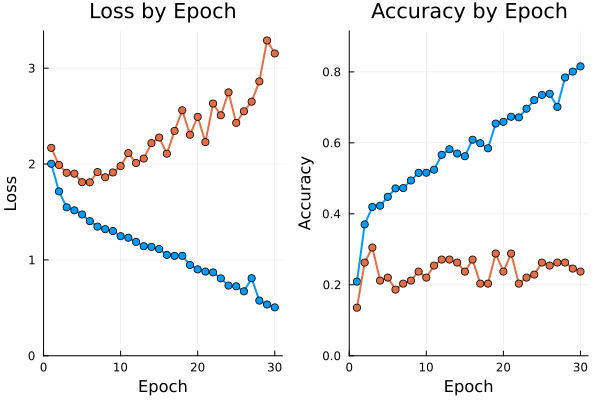

In [23]:
using Plots

plot_losses = plot(1:epochs, train_losses, label="Train Loss", xlabel="Epoch", ylabel="Loss", linewidth=2, markershape=:circle)
plot!(1:epochs, test_losses, label="Test Loss", linewidth=2, markershape=:circle)
title!("Loss by Epoch")
xlims!(0, epochs+1)
ylims!(0, maximum([train_losses; test_losses]) + 0.1)

plot_accuracies = plot(1:epochs, train_accuracies, label="Train Accuracy", xlabel="Epoch", ylabel="Accuracy", linewidth=2, markershape=:circle)
plot!(1:epochs, test_accuracies, label="Test Accuracy", linewidth=2, markershape=:circle)
title!("Accuracy by Epoch")
xlims!(0, epochs+1)
ylims!(0, maximum([train_accuracies; test_accuracies]) + 0.1)

plot(plot_losses, plot_accuracies, layout=(1,2), legend=false)

## Conclusions

Analysis of the results of training convolutional neural networks (CNN) showed that the model learns well on training data, but has problems with generalization to the test set. The difference in results between these sets becomes visible after less than 10 epochs. In such a situation, several steps are recommended to improve the generalization ability of the model.

### Model Expansion

Expanding the model may include adding additional convolutional layers that are able to extract more complex and abstract features from the data. These layers create a hierarchical model of data representation, with lower layers extracting simpler features and higher layers extracting more complex features. Expanding the model may also involve increasing the number of neurons in existing layers or adding new types of layers, such as dense layers.

### Added Dropout Layers

Dropout layers are a regularization technique that aims to prevent overfitting the model to the training data. They work by randomly "turning off" a certain percentage of neurons during the training process, which forces the network not to rely on any single neuron and learns a more robust representation of the data. This, in turn, can improve the model's ability to generalize to new, unknown data.

### Added L2 Regularization to the Loss Function

L2 regularization, also known as weight penalty or weight degradation, involves adding a term to the loss function that is proportional to the square of the value of the weights in the network. The purpose of this action is to discourage the network from accepting large weights, which can lead to overfitting. In practice, adding L2 regularization to the loss function can help smooth the decision boundaries of the model, which may contribute to better generalization to the test set

In summary, to improve the generalization ability of the CNN model, it is recommended to expand the network architecture, add dropout layers to prevent overfitting, and incorporate L2 regularization into the loss function to reduce model complexity by penalizing large weights. The implementation of these changes should be tested in subsequent experiments to assess their impact on improving the generalization of the model.

### Data Augmentation

Data augmentation can significantly improve the quality of the model by increasing the diversity of the training set. By applying various transformations, such as rotation, translation, scaling, mirroring, changing brightness or contrast, additional training examples can be generated from existing data, which increases the diversity of training data. Greater diversity in training data can help reduce the risk of overfitting as the model learns to recognize features in different contexts and orientations, which can translate into better generalization to new data. By exposing the model to different variants of training data, such as different lighting, object positions, or backgrounds, you can make the model more resistant to variability in environmental conditions and different variants of objects that it may encounter in real scenes. By simulating different environmental conditions and variants of the training data, you can adapt the model to the different conditions in which it may be used in practice, which can lead to better performance on real test data. If there are unbalanced classes in the training data, data augmentation can be used on smaller classes to balance the class sizes and improve the model's ability to recognize these classes. Data augmentation can help facilitate model generalization by learning more general features and patterns that apply to different variants of data, contributing to a better ability of the model to generalize to new data. Data augmentation is an effective technique for improving model quality by increasing the diversity of training data, reducing overfitting, and improving the model's ability to generalize to new data. This is especially useful when you have a limited amount of training data or when you want to improve model performance on real test data.

## Sources

1. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
2. https://github.com/Evizero/Augmentor.jl
3. https://docs.juliahub.com/Images/H8Vxc/0.22.4/autodocs/
4. https://marketsplash.com/tutorials/julia/julia-image-processing/
5. https://juliaimages.org/latest/pkgs/
6. https://github.com/topics/contrast-stretching
7. https://discourse.julialang.org/t/size-mismatch-convolution-layer/63190
8. https://discourse.julialang.org/t/flux-pooling-followed-by-dense/77394
9. https://fluxml.ai/Flux.jl/stable/ecosystem/
10. https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e